# Summary of Fraud Detection Code Lab

* Data is highly imbalanced
* Features of interval_after_signup and time related raw and aggregates are highly predictive of fraud
* Made actionable operation recommendations/proposal for business

# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns

#pd.set_option('display.max_columns', 500)

# Import and store dataset
fraud_data = pd.read_csv('imbalancedFraudDF.csv')
ipToCountry = pd.read_csv('IpAddress_to_Country.csv')



In [2]:
#Distribution of the label column
fraud_data['class'].value_counts()

0    136961
1      1415
Name: class, dtype: int64

In [3]:
fraud_data.head(10)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
3,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
4,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0
5,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0
6,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0
7,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0
8,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0
9,199700,2015-07-11 18:26:54,2015-10-28 21:59:40,13,TEPSJVVXGNTYR,Ads,Safari,F,35,1.819009e+09,0


In [4]:
import pandas_profiling

#Inline summary report without saving report as object
pandas_profiling.ProfileReport(fraud_data)

Number of variables,11
Number of observations,138376
Total Missing (%),0.0%
Total size in memory,11.6 MiB
Average record size in memory,88.0 B
Numeric,4
Categorical,5
Boolean,1
Date,0
Text (Unique),1
Rejected,0


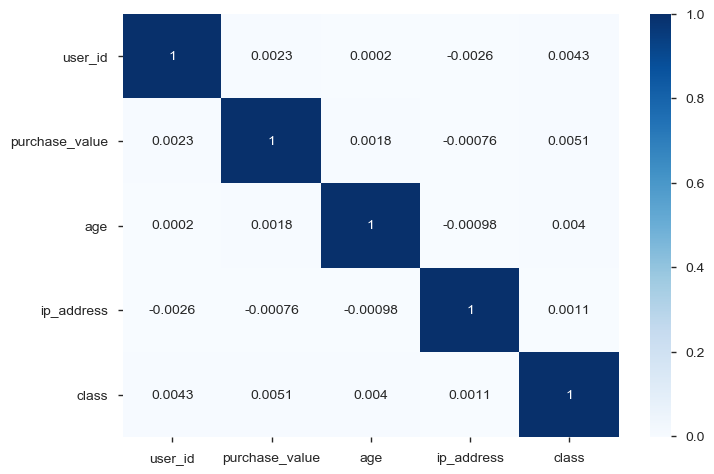

In [5]:
# Calculate correlation between each pair of variable
corr_matrix=fraud_data.corr()
 
# plot it
sns.heatmap(corr_matrix,annot=True, annot_kws={"size": 10},cmap="Blues")
#sns.plt.show()

plt.show()

## Missing values, outlier?

In [6]:
# count of NaN in each column
fraud_data.isna().sum()
#fraud_data.isnull().sum(axis = 0)

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [30]:
#pass for fraud detection
#check count of fraud that is outliers
from scipy import stats

z = np.abs(stats.zscore(fraud_data))
threshold = 3
print(np.where(z > 3))

Q1 = boston_df_o1.quantile(0.25)
Q3 = boston_df_o1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [7]:
#Task 1: Identify country info based on ip_address

ipToCountry = pd.read_csv('IpAddress_to_Country.csv')
ipToCountry.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [8]:
start = time.time()

countries = []
for i in range(len(fraud_data)):
    ip_address = fraud_data.loc[i, 'ip_address']#number
    #below [] is list of T/F, tmp is a df of size n * 3, n = len(tmp) is 1 match or 0 no match
    tmp = ipToCountry[(ipToCountry['lower_bound_ip_address'] <= ip_address) &
                    (ipToCountry['upper_bound_ip_address'] >= ip_address)]
    if len(tmp) == 1:#found match
        countries.append(tmp['country'].values[0])
    else:#no match
        countries.append('NA')
        
fraud_data['country'] = countries

fraud_data.head()
#can use binary search to optimize

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NA
3,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States
4,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0,Canada


In [9]:
ip_address = fraud_data.loc[3, 'ip_address']
tmp = ipToCountry[(ipToCountry['lower_bound_ip_address'] <= ip_address) &
                    (ipToCountry['upper_bound_ip_address'] >= ip_address)]
print(tmp)

      lower_bound_ip_address  upper_bound_ip_address        country
1604             415498240.0               415629311  United States


## Q: can you optimize the above look-up process?

# Feature Engineering(What types of features can we use?)

## Q: How to check if column user_id is unique(no dup) for time related aggregates?


In [14]:
print (fraud_data["user_id"].nunique())#138289
print (len(fraud_data.user_id))#138376
#most of the user_id has only the first 1 transaction, difficult to do time based aggregates, 
#e.g. amount/counts in past 1 day for this user

138376
138376


In [15]:
#time related features: can be done before split, as they has no interaction between other rows, solely based on other columns of the same row
fraud_data['interval_after_signup'] = (pd.to_datetime(fraud_data['purchase_time']) - pd.to_datetime(
        fraud_data['signup_time'])).dt.total_seconds()

fraud_data['signup_days_of_year'] = pd.DatetimeIndex(fraud_data['signup_time']).dayofyear

#bed time operation
fraud_data['signup_seconds_of_day'] = pd.DatetimeIndex(fraud_data['signup_time']).second + 60 * pd.DatetimeIndex(
    fraud_data['signup_time']).minute + 3600 * pd.DatetimeIndex(fraud_data['signup_time']).hour

fraud_data['purchase_days_of_year'] = pd.DatetimeIndex(fraud_data['purchase_time']).dayofyear
fraud_data['purchase_seconds_of_day'] = pd.DatetimeIndex(fraud_data['purchase_time']).second + 60 * pd.DatetimeIndex(
    fraud_data['purchase_time']).minute + 3600 * pd.DatetimeIndex(fraud_data['purchase_time']).hour

fraud_data = fraud_data.drop(['user_id','signup_time','purchase_time'], axis=1)


In [16]:
fraud_data.head()

,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,interval_after_signup,signup_days_of_year,signup_seconds_of_day,purchase_days_of_year,purchase_seconds_of_day
0,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0,55,82549,108,10031
1,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0,158,74390,159,5934
2,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NA,492085.0,118,76405,124,50090
3,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0,202,25792,252,67253
4,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0,Canada,4240931.0,141,21783,190,29114


In [18]:
print (fraud_data.source.value_counts())

SEO       55766
Ads       54913
Direct    27697
Name: source, dtype: int64


# Q: What now? train/test split? convert categorical features e.g. device_id to numericals? or SMOTE sampling?


In [ ]:
#what is smote
# What if convert source column by OHE now?
# it sneak peek the levels of this column in test data, what if there is another new level "newsPaper" in test, 
# but not in train? info leak, know ahead of time


In [30]:
y = fraud_data['class']
X = fraud_data.drop(['class'], axis=1)

#split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (110700, 13)
y_train.shape: (110700,)
X_test.shape: (27676, 13)
y_test.shape: (27676,)


In [20]:
X_train.head()

,purchase_value,device_id,source,browser,sex,age,ip_address,country,interval_after_signup,signup_days_of_year,signup_seconds_of_day,purchase_days_of_year,purchase_seconds_of_day
29343,12,OULPAZAFRFPXP,Ads,Chrome,M,42,3.690922e+09,Korea Republic of,3499664.0,183,67384,224,24648
12190,10,AIIWMFEYQQIEB,Ads,Opera,M,29,1.686759e+09,United States,6766039.0,5,78146,84,18585
19388,34,VUVETBUPCIWJE,Direct,Chrome,M,53,4.138429e+09,NA,5870515.0,197,81354,265,76669
89104,48,QCFULAJOYKFUU,Ads,Chrome,M,29,9.617337e+07,France,2145618.0,160,30920,185,16538
82082,44,IHRWLMIJMEEEU,Ads,FireFox,M,24,1.936025e+09,China,7079059.0,111,71897,193,66156


In [21]:
X_train.dtypes

purchase_value               int64
device_id                   object
source                      object
browser                     object
sex                         object
age                          int64
ip_address                 float64
country                     object
interval_after_signup      float64
signup_days_of_year          int64
signup_seconds_of_day        int64
purchase_days_of_year        int64
purchase_seconds_of_day      int64
dtype: object

# Convert categorical features with high cadinality to numericals



In [31]:
#converting needs to be done after split
X_train = pd.get_dummies(X_train, columns=['source', 'browser'])#need to drop ['source', 'browser']? no, auto dropped by get_dummies 
X_train['sex'] = (X_train.sex == 'M').astype(int)

# the more a device is shared, the more suspicious
X_train['n_dev_shared'] = X_train.device_id.map(X_train.device_id.value_counts(dropna=False))

# the more a ip is shared, the more suspicious
X_train['n_ip_shared'] = X_train.ip_address.map(X_train.ip_address.value_counts(dropna=False))

# the less visit from a country, the more suspicious
X_train['n_country_shared'] = X_train.country.map(X_train.country.value_counts(dropna=False))#lots of NAs in country column, #without dropna=False will produce nan in this col

X_train = X_train.drop(['device_id','ip_address','country'], axis=1)



##########################
X_test = pd.get_dummies(X_test, columns=['source', 'browser'])
X_test['sex'] = (X_test.sex == 'M').astype(int)

# the more a device is shared, the more suspicious
X_test['n_dev_shared'] = X_test.device_id.map(X_test.device_id.value_counts(dropna=False))

# the more a ip is shared, the more suspicious
X_test['n_ip_shared'] = X_test.ip_address.map(X_test.ip_address.value_counts(dropna=False))

# the less visit from a country, the more suspicious
X_test['n_country_shared'] = X_test.country.map(X_test.country.value_counts(dropna=False))

X_test = X_test.drop(['device_id','ip_address','country'], axis=1)


In [23]:
X_train.head(10)

,purchase_value,sex,age,interval_after_signup,signup_days_of_year,signup_seconds_of_day,purchase_days_of_year,purchase_seconds_of_day,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,n_dev_shared,n_ip_shared,n_country_shared
29343,12,1,42,3499664.0,183,67384,224,24648,1,0,0,1,0,0,0,0,1,1,3075
12190,10,1,29,6766039.0,5,78146,84,18585,1,0,0,0,0,0,1,0,1,1,42348
19388,34,1,53,5870515.0,197,81354,265,76669,0,1,0,1,0,0,0,0,1,1,16275
89104,48,1,29,2145618.0,160,30920,185,16538,1,0,0,1,0,0,0,0,1,1,2322
82082,44,1,24,7079059.0,111,71897,193,66156,1,0,0,0,1,0,0,0,1,1,8876
76812,56,1,25,7872819.0,102,78778,194,2797,1,0,0,1,0,0,0,0,1,1,42348
111006,67,1,43,7662881.0,143,68977,232,42258,1,0,0,0,1,0,0,0,1,1,16275
37929,29,0,25,1293152.0,69,70051,84,67203,0,0,1,0,0,0,0,1,1,1,42348
88089,20,1,18,7551233.0,225,22512,312,56945,0,0,1,1,0,0,0,0,1,1,42348
50851,14,1,28,6830027.0,188,26963,267,31390,1,0,0,0,1,0,0,0,1,1,42348


In [24]:
X_test.head(10)

,purchase_value,sex,age,interval_after_signup,signup_days_of_year,signup_seconds_of_day,purchase_days_of_year,purchase_seconds_of_day,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,n_dev_shared,n_ip_shared,n_country_shared
10224,19,1,34,4311302.0,190,36985,240,28287,1,0,0,0,0,0,0,1,1,1,4016
85132,31,0,41,4079557.0,75,48284,122,67041,1,0,0,1,0,0,0,0,1,1,4016
45717,29,1,30,6104979.0,58,68033,129,38612,1,0,0,1,0,0,0,0,1,1,349
62898,74,0,27,5206591.0,135,42763,195,65354,0,0,1,0,0,1,0,0,1,1,10675
6553,39,0,35,292543.0,201,59280,205,6223,0,1,0,0,0,1,0,0,1,1,1413
112819,53,1,22,5860266.0,79,71970,147,57036,0,0,1,0,0,1,0,0,1,1,680
8882,36,1,36,7344360.0,158,50580,243,50940,0,0,1,1,0,0,0,0,2,1,578
91322,46,1,47,1461417.0,34,5754,50,84771,0,1,0,0,0,1,0,0,1,1,10675
22545,74,1,43,6221886.0,140,55400,212,56486,1,0,0,0,1,0,0,0,1,1,10675
127081,38,1,25,3930718.0,220,31366,265,74084,1,0,0,1,0,0,0,0,1,1,2234


In [27]:
X_train['country'].value_counts(ascending=True)
#drawback: collision in the same bucket(no differentiation for these countries)

Bermuda                                     1
Tajikistan                                  1
Saint Kitts and Nevis                       1
British Indian Ocean Territory              1
Gambia                                      1
Myanmar                                     1
South Sudan                                 1
Gibraltar                                   1
Saint Martin                                1
Fiji                                        1
Benin                                       1
Bonaire; Sint Eustatius; Saba               1
Djibouti                                    1
San Marino                                  1
Monaco                                      1
Guadeloupe                                  1
Cape Verde                                  1
Madagascar                                  1
Niger                                       1
Yemen                                       1
Bhutan                                      2
Bahamas                           

# Q: What is the difference between normalization and standardization?


In [32]:
# # normalize (min-max) to [0,1], standardize(StandardScaler) to normal, mu=0,var = 1 can < 0, so we do normalize here

# needs to be brought to the same scale for models like LR with regularization(that are not tree based)

#Compute the train minimum and maximum to be used for later scaling:
scaler = preprocessing.MinMaxScaler().fit(X_train[['n_dev_shared', 'n_ip_shared', 'n_country_shared']]) 
#print(scaler.data_max_)

#transform the training data and use them for the model training
X_train[['n_dev_shared', 'n_ip_shared', 'n_country_shared']] = scaler.transform(X_train[['n_dev_shared', 'n_ip_shared', 'n_country_shared']])

#before the prediction of the test data, apply the same scaler obtained from above on X_test, not fitting a brandnew scaler on test
X_test[['n_dev_shared', 'n_ip_shared', 'n_country_shared']] = scaler.transform(X_test[['n_dev_shared', 'n_ip_shared', 'n_country_shared']])


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [33]:
X_train.n_dev_shared.value_counts(dropna=False)

0.0    105351
0.2      4872
0.4       306
0.6       120
0.8        45
1.0         6
Name: n_dev_shared, dtype: int64

In [34]:
X_test.n_dev_shared.value_counts(dropna=False)

0.0    27311
0.2      350
0.4       15
Name: n_dev_shared, dtype: int64

# Simple LogisticRegression model

In [77]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# predict on test
y_pred=logreg.predict(X_test)

# generate class probabilities
probs = classifier_RF.predict_proba(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [78]:
cm = metrics.confusion_matrix(y_test, y_pred)
cmDF = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
print(cmDF)
# generate class probabilities
probs = logreg.predict_proba(X_test)
print("%s: %r" % ("roc_auc_score is: ", roc_auc_score(y_test, probs[:, 1])))



        pred_0  pred_1
true_0   27380       0
true_1     296       0
roc_auc_score is: : 0.7590948463072277


# Simple RF model

In [45]:
classifier_RF = RandomForestClassifier(random_state=0)

classifier_RF.fit(X_train, y_train)

# predict class labels 0/1 for the test set
predicted = classifier_RF.predict(X_test)

# generate class probabilities
probs = classifier_RF.predict_proba(X_test)

# generate evaluation metrics
print("%s: %r" % ("accuracy_score is: ", accuracy_score(y_test, predicted)))
print("%s: %r" % ("roc_auc_score is: ", roc_auc_score(y_test, probs[:, 1])))
print("%s: %r" % ("f1_score is: ", f1_score(y_test, predicted )))#string to int

print ("confusion_matrix is: ")
cm = confusion_matrix(y_test, predicted)
cmDF = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
print(cmDF)
print ('recall =',float(cm[1,1])/(cm[1,0]+cm[1,1]))
print ('precision =', float(cm[1,1])/(cm[1,1] + cm[0,1]))#1.0


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy_score is: : 0.9949414655297009
roc_auc_score is: : 0.7659993608473337
f1_score is: : 0.6902654867256637
confusion_matrix is: 
        pred_0  pred_1
true_0   27380       0
true_1     140     156
recall = 0.527027027027027
precision = 1.0
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     27380
           1       1.00      0.53      0.69       296

   micro avg       0.99      0.99      0.99     27676
   macro avg       1.00      0.76      0.84     27676
weighted avg       0.99      0.99      0.99     27676



# SMOTE sampling

In [82]:

#Wrong way to sampling: smote before split train/test, then test data does not reflect true distribution in reality, 
#and “blend” information from the test set into the training of the model. overfit! think about the case of simple 
#oversampling (where I just duplicate observations). If I upsample a dataset before splitting it into a train and 
#validation set, I could end up with the same observation in both datasets

#https://imbalanced-learn.org/en/stable/install.html

# Install
# imbalanced-learn is currently available on the PyPi’s reporitories and you can install it via pip:

# pip install -U imbalanced-learn

#oversampling on only the training data, the right way! 
#sampling_strategy = number of samples in the majority class over the number of samples in the minority class after resampling

smote = SMOTE(random_state=12)
x_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

unique, counts = np.unique(y_train_sm, return_counts=True)

print (np.asarray((unique, counts)).T)

[[     0 109581]
 [     1 109581]]


In [50]:
#RF on smoted training data
classifier_RF_sm = RandomForestClassifier(random_state=0)

classifier_RF_sm.fit(x_train_sm, y_train_sm)

# predict class labels for the test set
predicted_sm = classifier_RF_sm.predict(X_test)

# generate class probabilities
probs_sm = classifier_RF_sm.predict_proba(X_test)


# generate evaluation metrics
print("%s: %r" % ("accuracy_score_sm is: ", accuracy_score(y_test, predicted_sm)))
print("%s: %r" % ("roc_auc_score_sm is: ", roc_auc_score(y_test, probs_sm[:, 1])))
print("%s: %r" % ("f1_score_sm is: ", f1_score(y_test, predicted_sm )))#string to int

print ("confusion_matrix_sm is: ")
cm_sm = confusion_matrix(y_test, predicted_sm)
cmDF = pd.DataFrame(cm_sm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
print(cmDF)
print ('recall or sens_sm =',float(cm_sm[1,1])/(cm_sm[1,0]+cm_sm[1,1]))
print ('precision_sm =', float(cm_sm[1,1])/(cm_sm[1,1] + cm_sm[0,1]))

print(classification_report(y_test, predicted_sm))
#different AUC??

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy_score_sm is: : 0.9948330683624801
roc_auc_score_sm is: : 0.7688288452806349
f1_score_sm is: : 0.6857142857142857
confusion_matrix_sm is: 
        pred_0  pred_1
true_0   27377       3
true_1     140     156
recall or sens_sm = 0.527027027027027
precision_sm = 0.9811320754716981
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     27380
           1       0.98      0.53      0.69       296

   micro avg       0.99      0.99      0.99     27676
   macro avg       0.99      0.76      0.84     27676
weighted avg       0.99      0.99      0.99     27676



[[   0 1119]
 [   1 1119]]


Text(0.5, 1.0, 'RandomUnderSampler Output ($n_{class}=64)$')

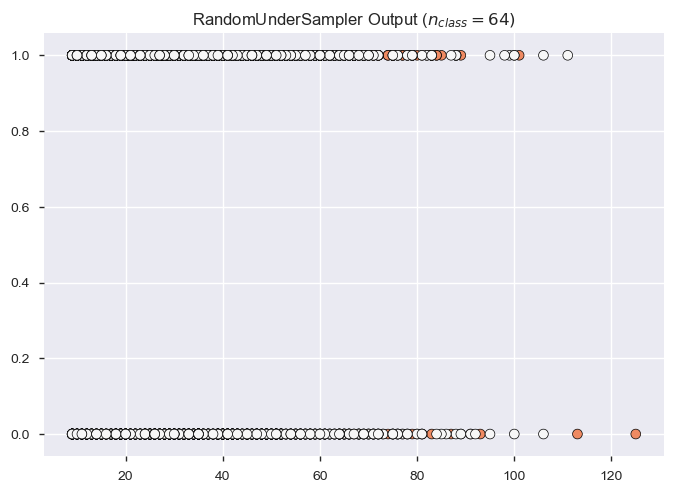

In [62]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x_train_us, y_train_us = rus.fit_sample(X_train, y_train)

unique, counts = np.unique(y_train_us, return_counts=True)

print (np.asarray((unique, counts)).T)

colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomUnderSampler Output ($n_{class}=64)$")

In [63]:
#RF on smoted training data
classifier_RF_us = RandomForestClassifier(random_state=0)

classifier_RF_us.fit(x_train_us, y_train_us)

# predict class labels for the test set
predicted_us = classifier_RF_us.predict(X_test)

# generate class probabilities
probs_us = classifier_RF_us.predict_proba(X_test)


# generate evaluation metrics
print("%s: %r" % ("accuracy_score_us is: ", accuracy_score(y_test, predicted_us)))
print("%s: %r" % ("roc_auc_score_us is: ", roc_auc_score(y_test, probs_us[:, 1])))
print("%s: %r" % ("f1_score_us is: ", f1_score(y_test, predicted_us )))#string to int

print ("confusion_matrix_us is: ")
cm_us = confusion_matrix(y_test, predicted_us)
cmDF = pd.DataFrame(cm_us, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
print(cmDF)
print ('recall or sens_us =',float(cm_us[1,1])/(cm_us[1,0]+cm_us[1,1]))
print ('precision_us =', float(cm_us[1,1])/(cm_us[1,1] + cm_us[0,1]))

print(classification_report(y_test, predicted_us))

accuracy_score_us is: : 0.9121982945512357
roc_auc_score_us is: : 0.7885435586243659
f1_score_us is: : 0.12463976945244956
confusion_matrix_us is: 
        pred_0  pred_1
true_0   25073    2307
true_1     123     173
recall or sens_us = 0.5844594594594594
precision_us = 0.06975806451612904
              precision    recall  f1-score   support

           0       1.00      0.92      0.95     27380
           1       0.07      0.58      0.12       296

   micro avg       0.91      0.91      0.91     27676
   macro avg       0.53      0.75      0.54     27676
weighted avg       0.99      0.91      0.94     27676



/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Parameter tuning by GridSearchCV

## Eval metrics for GridSearchCV over all fits upon combination of parameters and cv

In [51]:
# Eval metrics to be calculated for each combination of parameters and cv
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score, pos_label=1)
}

In [84]:
def grid_search_wrapper(model, parameters, refit_score='f1_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization(refit on the best model according to refit_score)
    prints classifier performance metrics
    """
#     skf = StratifiedKFold(n_splits=10)
#     grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
#                            cv=skf, return_train_score=True, n_jobs=-1)
    grid_search = GridSearchCV(model, parameters, scoring=scorers, refit=refit_score,
                           cv=3, return_train_score=True, n_jobs=-1)
    grid_search.fit(x_train_sm, y_train_sm)

    # make the predictions
    y_pred = grid_search.predict(X_test)
    y_prob = grid_search.predict_proba(X_test)[:, 1]
    
    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    cm = confusion_matrix(y_test, y_pred)
    cmDF = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
    print(cmDF)
    
    print("\t%s: %r" % ("roc_auc_score is: ", roc_auc_score(y_test, y_prob)))
    print("\t%s: %r" % ("f1_score is: ", f1_score(y_test, y_pred)))#string to int

    print ('recall = ', float(cm[1,1]) / (cm[1,0] + cm[1,1]))
    print ('precision = ', float(cm[1,1]) / (cm[1, 1] + cm[0,1]))

    return grid_search


## Optimizing on f1_score on LR

In [54]:
# C: inverse of regularization strength, smaller values specify stronger regularization
LRGrid = {"C" : np.logspace(-2,2,5), "penalty":["l1","l2"]}# l1 lasso l2 ridge
#param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
logRegModel = LogisticRegression(random_state=0)

grid_search_LR_f1 = grid_search_wrapper(logRegModel, LRGrid, refit_score='f1_score')

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best params for f1_score
{'C': 0.1, 'penalty': 'l1'}

Confusion matrix of Random Forest optimized for f1_score on the test data:
        pred_0  pred_1
true_0   27379       1
true_1     283      13
	roc_auc_score is: : 0.7721002457899828
	f1_score is: : 0.08387096774193548
recall =  0.04391891891891892
precision =  0.9285714285714286


## Optimizing on f1_score on RF

In [80]:
parameters = {        
'max_depth': [None,20],
'n_estimators' :  [50,100],
'class_weight' : [{0: 1, 1: w} for w in [0.1,0.2,0.5]]
}

clf = RandomForestClassifier(random_state=0)

In [85]:
grid_search_rf_f1 = grid_search_wrapper(clf, parameters, refit_score='f1_score')

Best params for f1_score
{'class_weight': {0: 1, 1: 0.1}, 'max_depth': None, 'n_estimators': 100}

Confusion matrix of Random Forest optimized for f1_score on the test data:
        pred_0  pred_1
true_0   27379       1
true_1     139     157
	roc_auc_score is: : 0.7753378995321106
	f1_score is: : 0.6916299559471365
recall =  0.5304054054054054
precision =  0.9936708860759493


In [57]:
best_rf_model_f1 = grid_search_rf_f1.best_estimator_
best_rf_model_f1

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 0.2},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=None, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [73]:
results_f1 = pd.DataFrame(grid_search_rf_f1.cv_results_)
results_sortf1 = results_f1.sort_values(by='mean_test_f1_score', ascending=False)
results_sortf1[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_f1_score', 'mean_train_precision_score', 'mean_train_recall_score', 'mean_train_f1_score','param_max_depth', 'param_class_weight', 'param_n_estimators']].round(3).head()



,mean_test_precision_score,mean_test_recall_score,mean_test_f1_score,mean_train_precision_score,mean_train_recall_score,mean_train_f1_score,param_max_depth,param_class_weight,param_n_estimators
0,1.0,0.52,0.684,1.0,0.978,0.989,None,"{0: 1, 1: 0.1}",50
1,1.0,0.52,0.684,1.0,0.998,0.999,None,"{0: 1, 1: 0.1}",100
2,1.0,0.52,0.684,1.0,0.725,0.840,20,"{0: 1, 1: 0.1}",50
3,1.0,0.52,0.684,1.0,0.720,0.837,20,"{0: 1, 1: 0.1}",100
4,1.0,0.52,0.684,1.0,0.978,0.989,None,"{0: 1, 1: 0.2}",50


In [74]:
classifier_RF = RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 0.2},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=None, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

classifier_RF.fit(X_train, y_train)

# predict class labels 0/1 for the test set
predicted = classifier_RF.predict(X_test)

# generate class probabilities
probs = classifier_RF.predict_proba(X_test)

# generate evaluation metrics
print("%s: %r" % ("accuracy_score is: ", accuracy_score(y_test, predicted)))
print("%s: %r" % ("roc_auc_score is: ", roc_auc_score(y_test, probs[:, 1])))
print("%s: %r" % ("f1_score is: ", f1_score(y_test, predicted )))#string to int

print ("confusion_matrix is: ")
cm = confusion_matrix(y_test, predicted)
cmDF = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
print(cmDF)
print ('recall =',float(cm[1,1])/(cm[1,0]+cm[1,1]))
print ('precision =', float(cm[1,1])/(cm[1,1] + cm[0,1]))#1.0

accuracy_score is: : 0.9949775979187744
roc_auc_score is: : 0.7742634937713462
f1_score is: : 0.6931567328918322
confusion_matrix is: 
        pred_0  pred_1
true_0   27380       0
true_1     139     157
recall = 0.5304054054054054
precision = 1.0


In [58]:
#Var Importance, make a guess?
pd.DataFrame(best_rf_model_f1.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)



,importance
interval_after_signup,0.387029
purchase_days_of_year,0.145238
purchase_seconds_of_day,0.081255
signup_seconds_of_day,0.079021
signup_days_of_year,0.058330
n_ip_shared,0.054763
purchase_value,0.044701
age,0.038378
n_dev_shared,0.037584
n_country_shared,0.027787


## Optimizing  recall_score on RF

In [16]:
grid_search_rf_recall = grid_search_wrapper(clf, parameters, refit_score='recall_score')

Best params for recall_score
{'n_estimators': 150, 'max_depth': 5, 'class_weight': {0: 1, 1: 100}}

Confusion matrix of Random Forest optimized for recall_score on the test data:
        pred_0  pred_1
true_0   27130     259
true_1     122     165
	roc_auc_score is: : 0.8120724983948513
	f1_score is: : 0.4641350210970464
recall =  0.574912891986
precision =  0.389150943396


In [17]:
best_RF_model_recall = grid_search_rf_recall.best_estimator_
best_RF_model_recall

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 100},
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=None, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [18]:
# predict class labels for the test set
predictedBest_recall = best_RF_model_recall.predict(X_test)

# generate class probabilities
probsBest_recall = best_RF_model_recall.predict_proba(X_test)

In [39]:
results_recall = pd.DataFrame(grid_search_rf_recall.cv_results_)
results_sortrecall = results_recall.sort_values(by='mean_test_recall_score', ascending=False)
# results_sortf1 = results_f1.sort_values(by='mean_test_f1_score', ascending=False)
results_sortrecall[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_f1_score', 'mean_train_precision_score', 'mean_train_recall_score', 'mean_train_f1_score','param_max_depth', 'param_class_weight', 'param_n_estimators']].round(3).head()
#recall is worse than default rf?? no this is on test, but train recall is better

,mean_test_precision_score,mean_test_recall_score,mean_test_f1_score,mean_train_precision_score,mean_train_recall_score,mean_train_f1_score,param_max_depth,param_class_weight,param_n_estimators
15,0.166,0.662,0.265,0.170,0.679,0.271,5,"{0: 1, 1: 100}",150
14,0.193,0.650,0.295,0.195,0.663,0.299,5,"{0: 1, 1: 100}",10
0,0.994,0.577,0.730,1.000,0.877,0.935,None,"{0: 1, 1: 0.2}",10
1,1.000,0.577,0.732,1.000,1.000,1.000,None,"{0: 1, 1: 0.2}",150
4,0.992,0.576,0.729,1.000,0.638,0.779,15,"{0: 1, 1: 0.2}",10


# Project tasks

In [29]:
#for task 3, based on the above var importance
trainDF = pd.concat([X_train, y_train], axis=1)
pd.crosstab(trainDF["n_dev_shared"],trainDF["class"])
#the larger n_dev_shared, the higher rate of fraud

class,0,1
n_dev_shared,,
0.0,104960,413
0.2,4397,359
0.4,167,208
0.6,35,97
0.8,9,31
1.0,4,20


In [34]:
fraud_data.groupby("class")[['interval_after_signup']].mean()#action velocity(consecutive operations/actions of user)
#interval_after_signup on frauds are significantly lower compared to legits

,interval_after_signup
class,
0,5.191179e+06
1,2.354059e+06


In [35]:
fraud_data.groupby("class")[['interval_after_signup']].median()#1
#more than half of fraud happened 1s after signed up

,interval_after_signup
class,
0,5194911.0
1,1.0


In [85]:
fraud_data[fraud_data['class'] == 1].head(100)

,user_id,signup_time,purchase_time,purchase_value,device_id,sex,age,ip_address,class,country,interval_after_signup,signup_days_of_year,signup_seconds_of_day,purchase_days_of_year,purchase_seconds_of_day,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari
136961,86574,2015-01-11 14:39:04,2015-01-11 14:39:05,61,ZQVCVEXPSAZCA,1,23,3.941890e+08,1,United States,1.0,11,52744,11,52745,0,0,1,0,0,0,0,1
136962,74145,2015-03-27 07:55:56,2015-07-20 06:59:34,55,DFQZESNZDEIPP,0,18,1.930175e+09,1,Korea Republic of,9932618.0,86,28556,201,25174,1,0,0,0,1,0,0,0
136963,282058,2015-01-05 08:18:00,2015-01-05 08:18:01,36,EGLGSEGYPMMAM,1,37,3.503224e+09,1,United States,1.0,5,29880,5,29881,0,0,1,0,1,0,0,0
136964,255332,2015-01-01 01:46:58,2015-01-01 01:46:59,19,SQWWBFDRYPGYA,0,36,2.105295e+08,1,United States,1.0,1,6418,1,6419,0,0,1,0,0,1,0,0
136965,399497,2015-01-01 14:29:27,2015-01-22 15:14:12,52,JWAVUHXQXTCHW,1,22,1.052881e+09,1,Nigeria,1817085.0,1,52167,22,54852,0,1,0,1,0,0,0,0
136966,337297,2015-02-10 13:01:00,2015-04-14 05:08:57,50,BCKHXUUTHTMMW,0,31,8.000143e+08,1,Canada,5414877.0,41,46860,104,18537,0,0,1,0,1,0,0,0
136967,46163,2015-03-05 09:23:48,2015-06-03 01:57:00,12,YFFPJJLHEHZML,1,45,1.957369e+09,1,China,7749192.0,64,33828,154,7020,0,1,0,0,0,0,0,1
136968,17097,2015-01-08 10:34:16,2015-01-08 10:34:17,12,IGAXAVAZFJYOB,1,33,2.447058e+09,1,Netherlands,1.0,8,38056,8,38057,1,0,0,0,0,0,0,1
136969,318808,2015-01-02 06:01:09,2015-01-02 06:01:10,22,MLKPWLXKZYANO,0,33,2.543532e+09,1,United States,1.0,2,21669,2,21670,1,0,0,1,0,0,0,0
136970,303431,2015-01-11 19:16:05,2015-01-11 19:16:06,61,SIKJNYXDSEUEG,1,30,3.410478e+09,1,Taiwan; Republic of China (ROC),1.0,11,69365,11,69366,1,0,0,1,0,0,0,0


In [19]:
#for task 4, how to use the prediction:
t = (10 * probsBest_recall[:, 1]).astype(int)
unique, counts = np.unique(t, return_counts=True)

print np.asarray((unique, counts)).T


#recommended:
#green: 1 - 3 pass
#grey: 4-7 need manual investigation
#red: 8,9 decline

[[    1     3]
 [    2 26956]
 [    3   222]
 [    4    71]
 [    5   241]
 [    6    23]
 [    7     6]
 [    8    41]
 [    9   113]]


In [ ]:
#HW: try XGBOOST and compare the performance of RF